In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
train=pd.read_excel("Data_Train.xlsx")

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.info()  #checking the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train.shape   # Checking how many columns i have

(10683, 11)

In [6]:
train['Airline'].value_counts()  #how much unique value we have

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Data preprocessing

# Time data handling

In [7]:
train.isnull().sum()  #checking how many null value i have

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train.dropna(inplace=True)  #droppping null values

In [9]:
train.shape  

(10682, 11)

In [10]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
#Convering date of jounney into two different columns

In [13]:
train["date"]=pd.to_datetime(train["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [14]:
train["month"]=pd.to_datetime(train["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [15]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
train.shape

(10682, 13)

In [17]:
#CREATE A NEW ROW YEAR TO CHECK HOW MANY UNIQUE VALUE I HAVE

In [18]:
train["year"]=pd.to_datetime(train["Date_of_Journey"],format="%d/%m/%Y").dt.year

In [19]:
train.year.value_counts()

2019    10682
Name: year, dtype: int64

In [20]:
#DROPPING A COLUMN

In [21]:
train.drop(["Date_of_Journey"],axis=1,inplace=True)

In [22]:
train.shape

(10682, 13)

In [23]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [24]:
train.drop(["year"],axis=1,inplace=True)

In [25]:
train.shape

(10682, 12)

In [26]:
train["dept_min"]=pd.to_datetime(train["Dep_Time"]).dt.minute

In [27]:
train["dept_hour"]=pd.to_datetime(train["Dep_Time"]).dt.hour

In [28]:
train.drop(["Dep_Time"],axis=1,inplace=True)   #AXIS=1 MEans column wise drop(it will search column wise)

In [29]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,dept_min,dept_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,20,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,50,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,50,16


In [30]:
train["arrival_min"]=pd.to_datetime(train["Arrival_Time"]).dt.minute

In [31]:
train["arrival_hour"]=pd.to_datetime(train["Arrival_Time"]).dt.hour

In [32]:
train.drop(["Arrival_Time"],axis=1,inplace=True)

In [33]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,dept_min,dept_hour,arrival_min,arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,20,22,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,50,5,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,25,9,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,5,18,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,50,16,35,21


In [34]:
"7h 25m".split()

['7h', '25m']

In [35]:
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           



In [36]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [37]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [38]:
train["duration_in_hour"]=duration_hours
train["duration_in_min"]=duration_mins


In [39]:
train.shape

(10682, 16)

In [40]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,dept_min,dept_hour,arrival_min,arrival_hour,duration_in_hour,duration_in_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,20,22,10,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,50,5,15,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,25,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,5,18,30,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,50,16,35,21,4,45


In [41]:
#Dropping duration

In [42]:
train.drop(["Duration"],axis=1,inplace=True)

# Categorical data handling

In [43]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,dept_min,dept_hour,arrival_min,arrival_hour,duration_in_hour,duration_in_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,20,22,10,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,50,5,15,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,25,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,18,30,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,50,16,35,21,4,45


In [44]:
#plotting price with respect to airline

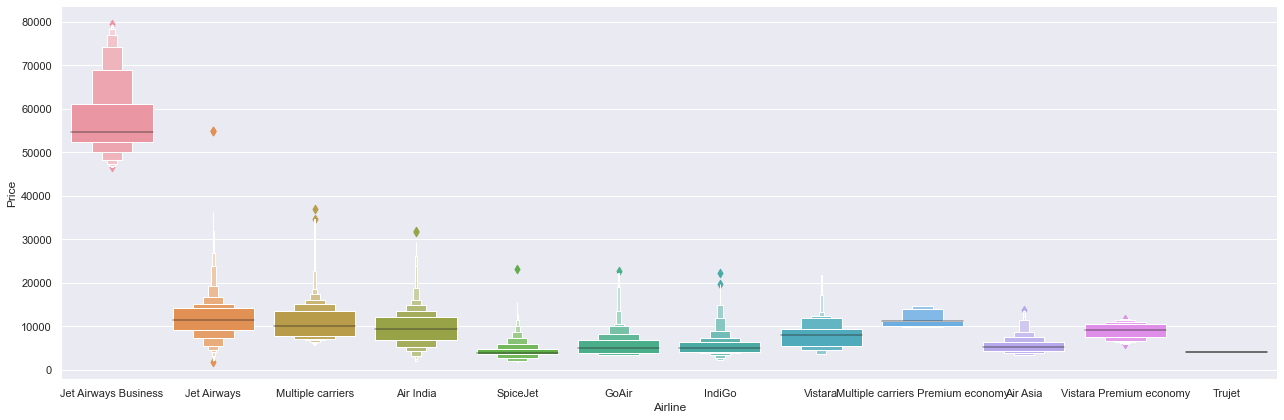

In [45]:
sns.catplot(x="Airline",y="Price",data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

In [46]:
#ONE HOT ENCODING

In [47]:
new_airline=train[["Airline"]]

In [48]:
new_airline=pd.get_dummies(new_airline,drop_first=True)


In [49]:
new_airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [50]:
train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

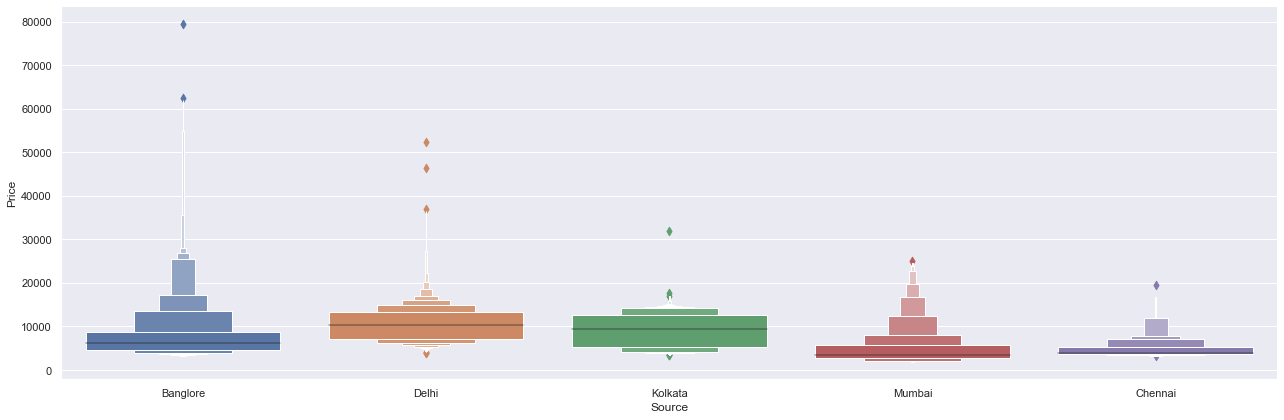

In [51]:
sns.catplot(x="Source",y="Price",data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

In [52]:
new_source=train[["Source"]]

In [53]:
new_source=pd.get_dummies(new_source,drop_first=True)

In [54]:
new_source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [55]:
train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [56]:
new_dest=train[["Destination"]]
new_dest=pd.get_dummies(new_dest,drop_first=True)
                

In [57]:
new_dest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [58]:
train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [59]:
#ROUTE AND ADDITIONAL INFO IS CARRIYING NO VALUE.HENCE I WILL DROP IT

In [60]:
train.drop(["Additional_Info","Route"],axis=1,inplace=True)

In [61]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,date,month,dept_min,dept_hour,arrival_min,arrival_hour,duration_in_hour,duration_in_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,20,22,10,1,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,50,5,15,13,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,25,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,5,18,30,23,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,50,16,35,21,4,45


In [62]:
#Total stop is ordinal data so we will use label encoding

# Label encoding for ordinal data

In [63]:
train.replace({"non-stop":0, "1 stop":1,"2 stops":2,"3 stops":4,"4 stops":5},inplace=True)

In [64]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,date,month,dept_min,dept_hour,arrival_min,arrival_hour,duration_in_hour,duration_in_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,20,22,10,1,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,50,5,15,13,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,25,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,5,18,30,23,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,50,16,35,21,4,45


# Adding all the feautures

In [65]:
new_train=pd.concat([train,new_airline,new_source,new_dest],axis=1)   ###axis=1 is used for column 

In [66]:
new_train.head()

,Airline,Source,Destination,Total_Stops,Price,date,month,dept_min,dept_hour,arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,20,22,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,50,5,15,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,25,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,5,18,30,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,50,16,35,...,0,0,0,0,0,0,0,0,0,1


In [67]:
new_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [68]:
new_train.head()

,Total_Stops,Price,date,month,dept_min,dept_hour,arrival_min,arrival_hour,duration_in_hour,duration_in_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,20,22,10,1,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,50,5,15,13,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,25,9,25,4,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,5,18,30,23,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,50,16,35,21,4,45,...,0,0,0,0,0,0,0,0,0,1


In [69]:
new_train.shape

(10682, 30)

# Pre processing for test data

In [70]:
test=pd.read_excel("Test_set.xlsx")

In [71]:
test.shape

(2671, 10)

In [72]:
test["date"]=pd.to_datetime(test["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [73]:
test["month"]=pd.to_datetime(test["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [74]:
test.drop(["Date_of_Journey"],axis=1,inplace=True)

In [75]:
test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,date,month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [76]:
test["dept_min"]=pd.to_datetime(test["Dep_Time"]).dt.minute

In [77]:
test["dept_hour"]=pd.to_datetime(test["Dep_Time"]).dt.hour

In [78]:
test.drop(["Dep_Time"],axis=1,inplace=True)

In [79]:
test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,date,month,dept_min,dept_hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,30,17
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,20,6
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,15,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,0,8
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,55,23


In [80]:
test["arrival_min"]=pd.to_datetime(test["Arrival_Time"]).dt.minute

In [81]:
test["arrival_hour"]=pd.to_datetime(test["Arrival_Time"]).dt.hour

In [82]:
test.drop(["Arrival_Time"],axis=1,inplace=True) 

In [83]:
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,date,month,dept_min,dept_hour,arrival_min,arrival_hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,30,17,25,4
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,20,6,20,10
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,15,19,0,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,0,8,0,21
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,55,23,45,2


In [84]:
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i] 

In [85]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [86]:
test["duration_in_hour"]=duration_hours
test["duration_in_min"]=duration_mins


In [87]:
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,date,month,dept_min,dept_hour,arrival_min,arrival_hour,duration_in_hour,duration_in_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,30,17,25,4,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,20,6,20,10,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,15,19,0,19,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,0,8,0,21,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,55,23,45,2,2,50


In [88]:
test.drop(["Duration"],axis=1,inplace=True)

In [89]:
new_airline=test[["Airline"]]
new_airline=pd.get_dummies(new_airline,drop_first=True)


In [90]:
new_source=test[["Source"]]
new_source=pd.get_dummies(new_source,drop_first=True)

In [91]:
new_dest=test[["Destination"]]
new_dest=pd.get_dummies(new_dest,drop_first=True)

In [92]:
test.drop(["Additional_Info","Route"],axis=1,inplace=True)

In [93]:
test.replace({"non-stop":0, "1 stop":1,"2 stops":2,"3 stops":4,"4 stops":5},inplace=True)

In [94]:
new_test=pd.concat([test,new_airline,new_source,new_dest],axis=1) 

In [95]:
new_test.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [96]:
new_test.head()

,Total_Stops,date,month,dept_min,dept_hour,arrival_min,arrival_hour,duration_in_hour,duration_in_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,30,17,25,4,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,20,6,20,10,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,15,19,0,19,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,0,8,0,21,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,55,23,45,2,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [97]:
new_test.shape

(2671, 28)

In [98]:
new_train.shape

(10682, 30)

In [99]:
new_train.head()

,Total_Stops,Price,date,month,dept_min,dept_hour,arrival_min,arrival_hour,duration_in_hour,duration_in_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,20,22,10,1,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,50,5,15,13,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,25,9,25,4,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,5,18,30,23,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,50,16,35,21,4,45,...,0,0,0,0,0,0,0,0,0,1


# Model training


In [101]:
new_train.columns

Index(['Total_Stops', 'Price', 'date', 'month', 'dept_min', 'dept_hour',
       'arrival_min', 'arrival_hour', 'duration_in_hour', 'duration_in_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [102]:
new_train.shape

(10682, 30)

In [103]:
X= new_train.loc[:,['Total_Stops', 'date', 'month', 'dept_min', 'dept_hour',
       'arrival_min', 'arrival_hour', 'duration_in_hour', 'duration_in_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [104]:
X.head()

,Total_Stops,date,month,dept_min,dept_hour,arrival_min,arrival_hour,duration_in_hour,duration_in_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,20,22,10,1,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,50,5,15,13,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,25,9,25,4,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,5,18,30,23,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,50,16,35,21,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
Y=new_train.iloc[:,1]

In [106]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [107]:
#PLOTTING THE CORREALTION BETWEEN DEPENDENT AND INDEPENDENT FEATURE

In [108]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,date,month,dept_min,dept_hour,arrival_min,arrival_hour,duration_in_hour,duration_in_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,20,22,10,1,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,50,5,15,13,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,25,9,25,4,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,5,18,30,23,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,50,16,35,21,4,45


#SElecting important features using heatmap

Finding co relation between dependent and independent variables

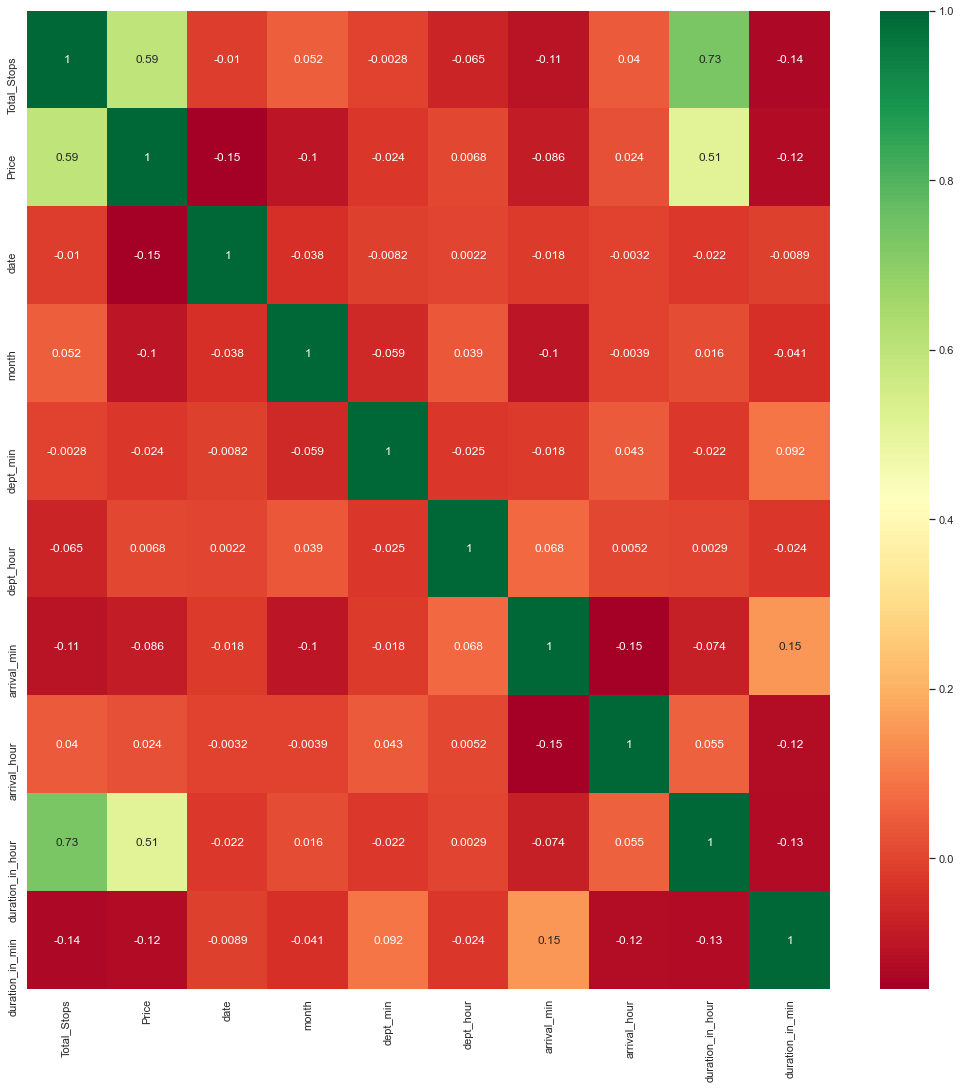

In [111]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),annot=True,  cmap = "RdYlGn")
plt.show()

#Finding Important feature using extra tree regressor

In [113]:
from sklearn.ensemble import ExtraTreesRegressor
s=ExtraTreesRegressor()
s.fit(X,Y)

ExtraTreesRegressor()

In [114]:
print(s.feature_importances_)

[1.92104965e-01 1.43383860e-01 5.35535117e-02 2.12892399e-02
 2.35550264e-02 1.88247774e-02 2.80828508e-02 1.45956592e-01
 1.79406642e-02 1.12027540e-02 2.49572465e-03 2.17162029e-02
 1.43288834e-01 6.77831508e-02 1.51328597e-02 7.36601758e-04
 3.98895887e-03 1.27000003e-04 4.76766333e-03 7.78620950e-05
 4.33409009e-04 1.13099027e-02 3.19609846e-03 7.31737879e-03
 1.20449730e-02 1.84314368e-02 5.87861659e-03 5.16476261e-04
 2.48626083e-02]


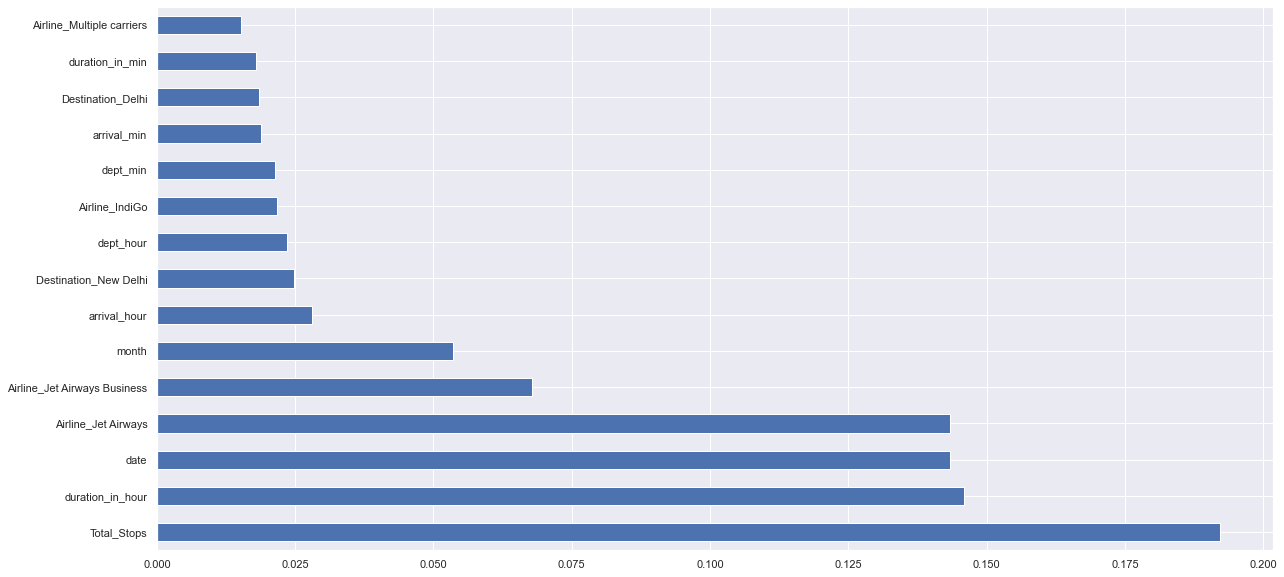

In [119]:
plt.figure(figsize=(20,10))
important_feature=pd.Series(s.feature_importances_,index=X.columns)
important_feature.nlargest(15).plot(kind='barh')
plt.show()

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [121]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [122]:
y_pred = reg_rf.predict(X_test)

In [123]:
reg_rf.score(X_train, y_train)

0.9551146724404931

In [124]:
reg_rf.score(X_test, y_test)

0.8037322126982109

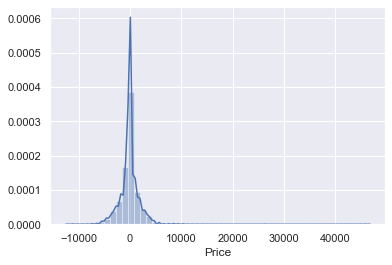

In [125]:
sns.distplot(y_test-y_pred)
plt.show()

In [126]:
from sklearn import metrics

In [127]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1162.17187046068
MSE: 4004044.7186298985
RMSE: 2001.0109241655575


In [128]:
metrics.r2_score(y_test, y_pred)

0.8037322126982109

# Hyper parameter tuning

In [129]:
from sklearn.model_selection import RandomizedSearchCV

In [130]:
n_estimators = [int(x) for x in np.linspace(start = 120, stop = 1400, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 40, num = 4)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [131]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [132]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 15, cv = 8, verbose=2, random_state=45, n_jobs = 1)

In [133]:
rf_random.fit(X_train,y_train)

Fitting 8 folds for each of 15 candidates, totalling 120 fits
[CV] n_estimators=262, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=262, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=   5.7s
[CV] n_estimators=262, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  n_estimators=262, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=   6.6s
[CV] n_estimators=262, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=262, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=   6.1s
[CV] n_estimators=262, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=262, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=   5.7s
[CV] n_estimators=262, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=262, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=   5.4s
[CV] n_estimators=262, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=262, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=   5.3s
[CV] n_estimators=262, min_samples

[CV]  n_estimators=120, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   2.7s
[CV] n_estimators=120, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=120, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   3.0s
[CV] n_estimators=120, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=120, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   3.0s
[CV] n_estimators=120, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=120, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   2.8s
[CV] n_estimators=120, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20 
[CV]  n_estimators=120, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=20, total=   2.9s
[CV] n_estimators=120, min_samples

[CV]  n_estimators=1257, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   7.1s
[CV] n_estimators=546, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=40 
[CV]  n_estimators=546, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=40, total=  12.2s
[CV] n_estimators=546, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=40 
[CV]  n_estimators=546, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=40, total=  12.4s
[CV] n_estimators=546, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=40 
[CV]  n_estimators=546, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=40, total=  12.1s
[CV] n_estimators=546, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=40 
[CV]  n_estimators=546, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=40, total=  12.1s
[CV] n_estimators=546, min_samples_split

[CV]  n_estimators=688, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   4.7s
[CV] n_estimators=688, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=688, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   4.8s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 29.7min finished


RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(), n_iter=15, n_jobs=1,
                   param_distributions={'max_depth': [10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [120, 262, 404, 546,
                                                         688, 831, 973, 1115,
                                                         1257, 1400]},
                   random_state=45, scoring='neg_mean_squared_error',
                   verbose=2)

In [134]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40}

In [135]:
prediction = rf_random.predict(X_test)

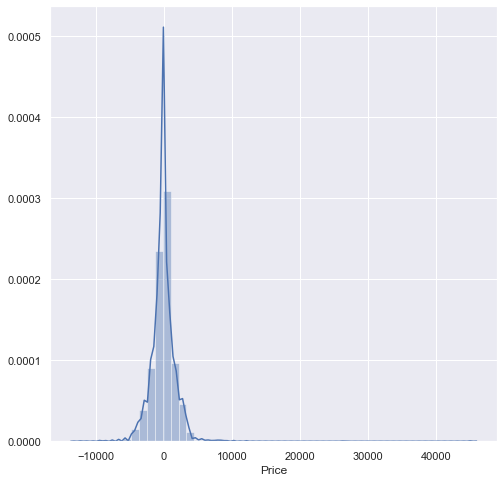

In [136]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [137]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1164.2128565503801
MSE: 3769988.14373885
RMSE: 1941.6457307497808


In [138]:
metrics.r2_score(y_test, prediction)

0.8152050531096988

# saving the model

In [139]:
import pickle
file = open('flight_price_randomforest.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [140]:
model = open('flight_price_randomforest.pkl','rb')
randomforest = pickle.load(model)

In [141]:
y_prediction = randomforest.predict(X_test)

In [142]:
metrics.r2_score(y_test, y_prediction)

0.8152050531096988